File d:\PhD\QPR Data\2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS\2022-04-04 411MHz test run 2.00K.txt contains No Data and will be skipped.
File d:\PhD\QPR Data\2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS\2022-04-08 411MHz B_max 1.00K.txt contains No Data and will be skipped.
2.5
218    2.5010
219    2.4992
220    2.4993
221    2.5007
222    2.4994
        ...  
419    2.5005
420    2.4996
421    2.5004
422    2.4997
423    2.5005
Name: LS336 B [K], Length: 206, dtype: float64


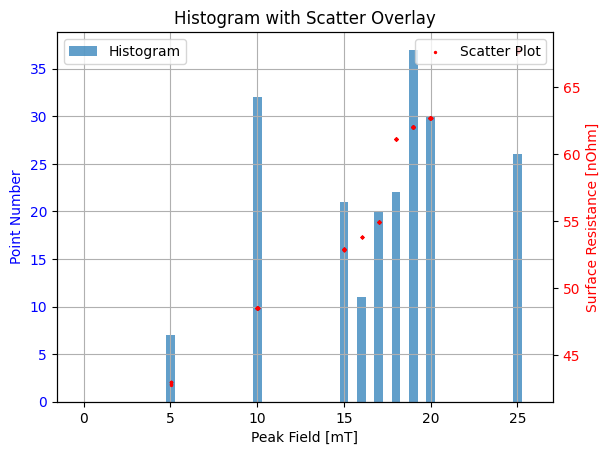

In [1]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funclib.importf import *

script_dir = os.path.dirname(os.path.abspath("main.ipynb"))
phd_dir = os.path.dirname(script_dir)
TestPath = os.path.join(phd_dir, "QPR Data", "2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS")

Test1 = HandleTest(TestPath)
Test1Data = Test1.load_data(pattern="*41*MHz*.txt")

#Test1Data.info()
#pd.set_option('display.max_rows', None)
#print(Test1Data["File Name"])
#print(Test1.Data["Run"].unique())

Test1.plotHistogram(step = 0.5, ParamName=FieldNames.SENS_B, ParamVal=2.5, ParamTol=0.05, Run=1)


In [4]:
## this is for data inspection
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)


display=filter_by_param(Test1.FilteredData, FieldNames.PEAK_FIELD, 10, 1, FieldNames.RS, FieldNames.PEAK_FIELD, "Run", "File Name", Print=True)

     Surface Resistance [nOhm]  Peak Field on Sample [mT] Run                                            File Name
225                  48.508180                  10.015732   1  2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
226                  48.508180                  10.015732   1  2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
227                  48.519208                  10.017040   1  2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
228                  48.519208                  10.017040   1  2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
229                  48.519208                  10.017040   1  2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
230                  48.519208                  10.017040   1  2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
231                  48.519208                  10.017040   1  2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
232                  48.517682                  10.017040   1  2022-04-04 411MHz